* Course    : CS513 - Knowledge Discovery and Data Mining
* First Name: John
* Last Name : Rizzo
* Student ID: 20036833
* Purpose   : CS513_HW_07_NB

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [2]:
folder='../data/'
df = pd.read_csv(folder+'breast-cancer-wisconsin.csv',
                 na_values='?')

In [3]:
print(df.isna().sum())

Sample     0
F1         0
F2         0
F3         0
F4         0
F5         0
F6        16
F7         0
F8         0
F9         0
Class      0
dtype: int64


In [4]:
df = df.dropna()

In [5]:
print(df.isna().sum())

Sample    0
F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
Class     0
dtype: int64


In [6]:
df['target'] = df['Class'].map({4: 'malignant', 2: 'benign'})
df['target'] = df['target'].astype('category')
df.head()

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class,target
0,1000025,5,1,1,1,2,1.0,3,1,1,2,benign
1,1002945,5,4,4,5,7,10.0,3,2,1,2,benign
2,1015425,3,1,1,1,2,2.0,3,1,1,2,benign
3,1016277,6,8,8,1,3,4.0,3,7,1,2,benign
4,1017023,4,1,1,3,2,1.0,3,1,1,2,benign


In [7]:
attr = df.drop(columns=[ 'Class', 'target'])
target = df['target']

In [8]:
attr.head()

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,1000025,5,1,1,1,2,1.0,3,1,1
1,1002945,5,4,4,5,7,10.0,3,2,1
2,1015425,3,1,1,1,2,2.0,3,1,1
3,1016277,6,8,8,1,3,4.0,3,7,1
4,1017023,4,1,1,3,2,1.0,3,1,1


In [9]:
# target=pd.get_dummies(target,prefix='ouput')
target.head()

0    benign
1    benign
2    benign
3    benign
4    benign
Name: target, dtype: category
Categories (2, object): ['benign', 'malignant']

In [10]:
scaler = StandardScaler()
attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)
attr.head()

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,-0.123664,0.197905,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484
1,-0.118956,0.197905,0.277252,0.262783,0.758032,1.695166,1.772867,-0.181827,-0.285105,-0.3484
2,-0.098833,-0.511643,-0.702212,-0.741774,-0.639366,-0.555608,-0.424217,-0.181827,-0.612927,-0.3484
3,-0.097459,0.552679,1.583204,1.602192,-0.639366,-0.105454,0.125054,-0.181827,1.354008,-0.3484
4,-0.096256,-0.156869,-0.702212,-0.741774,0.059333,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484


In [11]:
X_train, X_test, y_train, y_test = train_test_split(attr, target,random_state=82, test_size=0.3)
print(X_train.shape)
print(y_train.shape)

(478, 10)
(478,)


['benign' 'benign' 'benign' 'malignant' 'benign' 'benign' 'benign'
 'malignant' 'benign' 'malignant' 'benign' 'benign' 'benign' 'benign'
 'malignant' 'benign' 'benign' 'benign' 'malignant' 'benign' 'benign'
 'malignant' 'benign' 'benign' 'malignant' 'malignant' 'malignant'
 'benign' 'malignant' 'benign' 'benign' 'benign' 'benign' 'malignant'
 'benign' 'malignant' 'benign' 'malignant' 'malignant' 'benign' 'benign'
 'malignant' 'benign' 'malignant' 'benign' 'benign' 'malignant'
 'malignant' 'benign' 'malignant' 'benign' 'benign' 'malignant'
 'malignant' 'malignant' 'malignant' 'benign' 'malignant' 'malignant'
 'benign' 'benign' 'benign' 'malignant' 'malignant' 'benign' 'malignant'
 'malignant' 'benign' 'malignant' 'malignant' 'malignant' 'benign'
 'malignant' 'malignant' 'benign' 'benign' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant' 'benign' 'malignant' 'malignant'
 'malignant' 'benign' 'malignant' 'malignant' 'benign' 'benign' 'benign'
 'malignant' 'benign' 'malignant' '

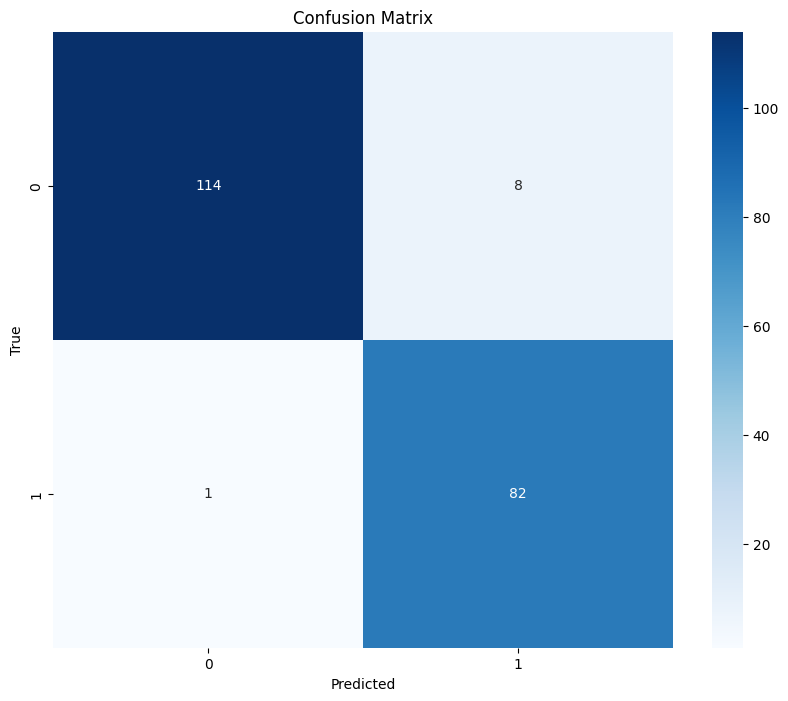

In [12]:


model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)
print(f'Accuracy Score: {metrics.accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix\n{metrics.confusion_matrix(y_test, y_pred)}')
print(metrics.classification_report(y_test, y_pred))
plt.figure(figsize=(10, 8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()